In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to load model data from a file
def load(file, skip):
    df = pd.read_csv(file, sep='\s+', skiprows=skip, header=None)
    df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df.melt(id_vars=['Year'], var_name='Month', value_name='Precipitation')
    months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                     'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    df['Month'] = df['Month'].map(months)
    
    return df

def monthly_means(df):
    period1 = df[(df['Year'] >= 1999) & (df['Year'] <= 2024)]
    period2 = df[(df['Year'] >= 2025) & (df['Year'] <= 2050)]
    
    monthly_means_1999_2024 = period1.groupby('Month')['Precipitation'].mean()
    monthly_means_2025_2050 = period2.groupby('Month')['Precipitation'].mean()
    
    return monthly_means_1999_2024, monthly_means_2025_2050


def factors(means_1999_2024, means_2025_2050):
    factors = np.where(means_1999_2024 != 0, means_2025_2050 / means_1999_2024, np.nan)
    return factors


def plot_factors(all_factors):
    plt.figure(figsize=(10, 6))
    months = np.arange(1, 13)
    for model, factors in all_factors.items():
        plt.figure()
        plt.plot(months, factors, label=model)

        plt.xlabel('Month')
        plt.ylabel('Factor (2025-2050 / 1999-2024)')
        plt.title(f'Monthly Factors for Climate Models, {model}')
        plt.legend(loc="upper right")
        plt.grid(True)
        plt.show()

In [60]:
file_paths = [f'ssp245_{i}.txt' for i in range(0, 39)]
skip=[59, 59, 56, 61, 61, 65, 65, 65, 58, 58, \
      58, 60, 66, 64, 65, 60, 57, 58, 58, 58, \
      58, 58, 60, 58, 59, 59, 63, 58, 56, 56, \
      59, 59, 57, 58, 60, 60, 58, 60, 59, 58]

all_factors = {}
i = 1
for file_path in file_paths:
    model_name = os.path.basename(file_path).replace(".txt", "")
    df = load(file_path, skip[i-1])
    means_1999_2024, means_2025_2050 = monthly_means(df)
    fac = factors(means_1999_2024, means_2025_2050)
    all_factors[model_name] = fac
    i = i+1


#plot_factors(all_factors)

In [3]:
all_factors_array = np.array(list(all_factors.values()))
avg_factors = np.mean(all_factors_array, axis=0)
std_factors = np.std(all_factors_array, axis=0)

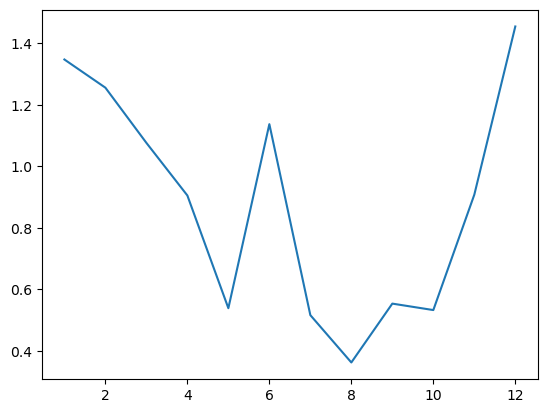

In [55]:
scenario = all_factors["ssp245_19"]
months = np.arange(1, 13)
plt.plot(months, control)

In [56]:
df_Rainfall = pd.read_csv(
    'Precipitation_data_79-23.csv', delimiter=';', index_col=[0], parse_dates=True)
df_Rainfall.index = pd.to_datetime(df_Rainfall.index, dayfirst=True)
df_Rainfall.rename(columns={'(mm) Precipitation (ERA5_AG) at CE_ID_0, 1979-01-01 to 2023-12-31': 'RH'}, inplace=True)


df_Rainfall['Year'] = df_Rainfall.index.year
df_Rainfall['Month'] = df_Rainfall.index.month

df_Rainfall = df_Rainfall.groupby(['Year', 'Month'])['RH'].mean().reset_index()



In [57]:
period1 = df_Rainfall[(df_Rainfall['Year'] >= 1973) & (df_Rainfall['Year'] <= 1998)]
period2 = df_Rainfall[(df_Rainfall['Year'] >= 1998) & (df_Rainfall['Year'] <= 2023)]

monthly_means_1973_1998 = period1.groupby('Month')['RH'].mean()
monthly_means_1998_2023 = period2.groupby('Month')['RH'].mean()

control = np.where(monthly_means_1973_1998 != 0, monthly_means_1998_2023 / monthly_means_1973_1998, np.nan)

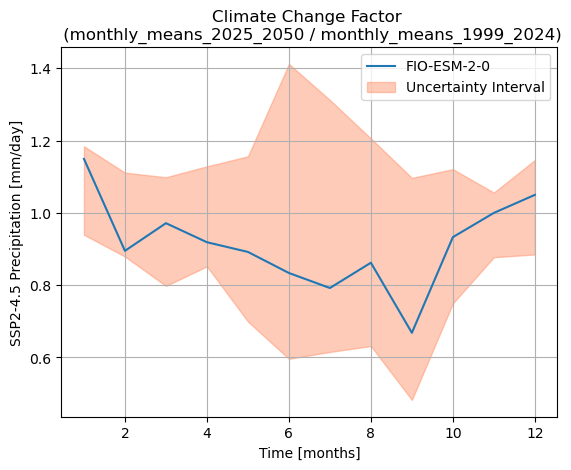

In [58]:
plt.plot(months, scenario, label = "FIO-ESM-2-0")
plt.fill_between(months, avg_factors - std_factors, avg_factors+ std_factors, color='coral', alpha=0.4, label='Uncertainty Interval')
plt.legend()
plt.xlabel("Time [months]")
plt.ylabel("SSP2-4.5 Precipitation [mm/day]")
plt.title("Climate Change Factor \n (monthly_means_2025_2050 / monthly_means_1999_2024)")
plt.grid()

In [59]:
print(scenario)

[1.14946753 0.89496182 0.97152135 0.91876808 0.89197292 0.83366963
 0.79208127 0.86206924 0.66807557 0.93287499 0.99994977 1.04984042]


In [61]:
df = pd.read_csv('Precipitation_all.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'PRCP']
df.columns = column_names
df["Date"] = pd.to_datetime(df['Date'], dayfirst = True)
df["PRCP"] = df["PRCP"].astype(float)

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the date
df['Month'] = df['Date'].dt.month

# Define the factors for each month (assuming you have this as a list or array)
factors = [1.14946753, 0.89496182, 0.97152135, 0.91876808, 0.89197292, 0.83366963,
 0.79208127, 0.86206924, 0.66807557, 0.93287499, 0.99994977, 1.04984042]

# Create a dictionary mapping month numbers to factors (1 for Jan, 2 for Feb, ..., 12 for Dec)
factor_dict = {1: factors[0], 2: factors[1], 3: factors[2], 4: factors[3], 5: factors[4], 6: factors[5], 
               7: factors[6], 8: factors[7], 9: factors[8], 10: factors[9], 11: factors[10], 12: factors[11]}

# Apply the factor for each row based on the month
df['PRCP_adjusted'] = df.apply(lambda row: row['PRCP'] * factor_dict[row['Month']], axis=1)

# Display the updated DataFrame
print(df[['Date', 'PRCP', 'PRCP_adjusted']])

           Date    PRCP  PRCP_adjusted
0    2019-08-01  0.0000       0.000000
1    2019-08-02  0.0200       0.017241
2    2019-08-03  0.0000       0.000000
3    2019-08-04  0.0000       0.000000
4    2019-08-05  0.0000       0.000000
...         ...     ...            ...
1819 2024-07-28  0.0000       0.000000
1820 2024-07-29  0.0000       0.000000
1821 2024-07-30  0.0000       0.000000
1822 2024-07-31  0.0000       0.000000
1823 2024-08-01  0.3215       0.277155

[1824 rows x 3 columns]


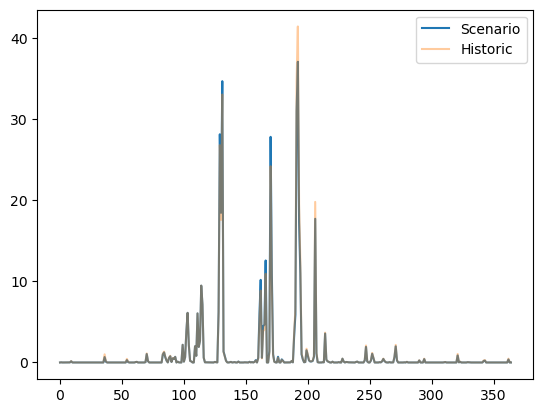

In [72]:

plt.plot(df['PRCP_adjusted'][0:365], label = "Scenario")
plt.plot(df['PRCP'][0:365], alpha=0.4, label="Historic")
plt.legend()

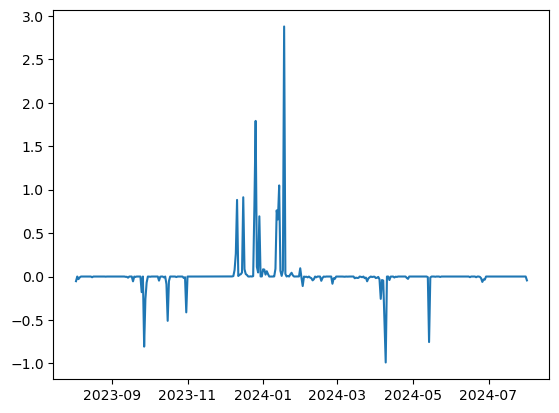

In [83]:
plt.plot(df["Date"][-365:], df['PRCP_adjusted'][-365:] - df['PRCP'][-365:])

In [75]:
df

,Date,PRCP,Month,PRCP_adjusted
0,2019-08-01,0.0000,8,0.000000
1,2019-08-02,0.0200,8,0.017241
2,2019-08-03,0.0000,8,0.000000
3,2019-08-04,0.0000,8,0.000000
4,2019-08-05,0.0000,8,0.000000
...,...,...,...,...
1819,2024-07-28,0.0000,7,0.000000
1820,2024-07-29,0.0000,7,0.000000
1821,2024-07-30,0.0000,7,0.000000
1822,2024-07-31,0.0000,7,0.000000
